# Diamond Price Prediction Project

*Importing Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

*Loading Daimond Dataset*

In [2]:
df = pd.read_csv('diamonds.csv')
y = df['price'] 
df_feat = df.drop(['price','Unnamed: 0'],axis=1)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_feat.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


# EDA

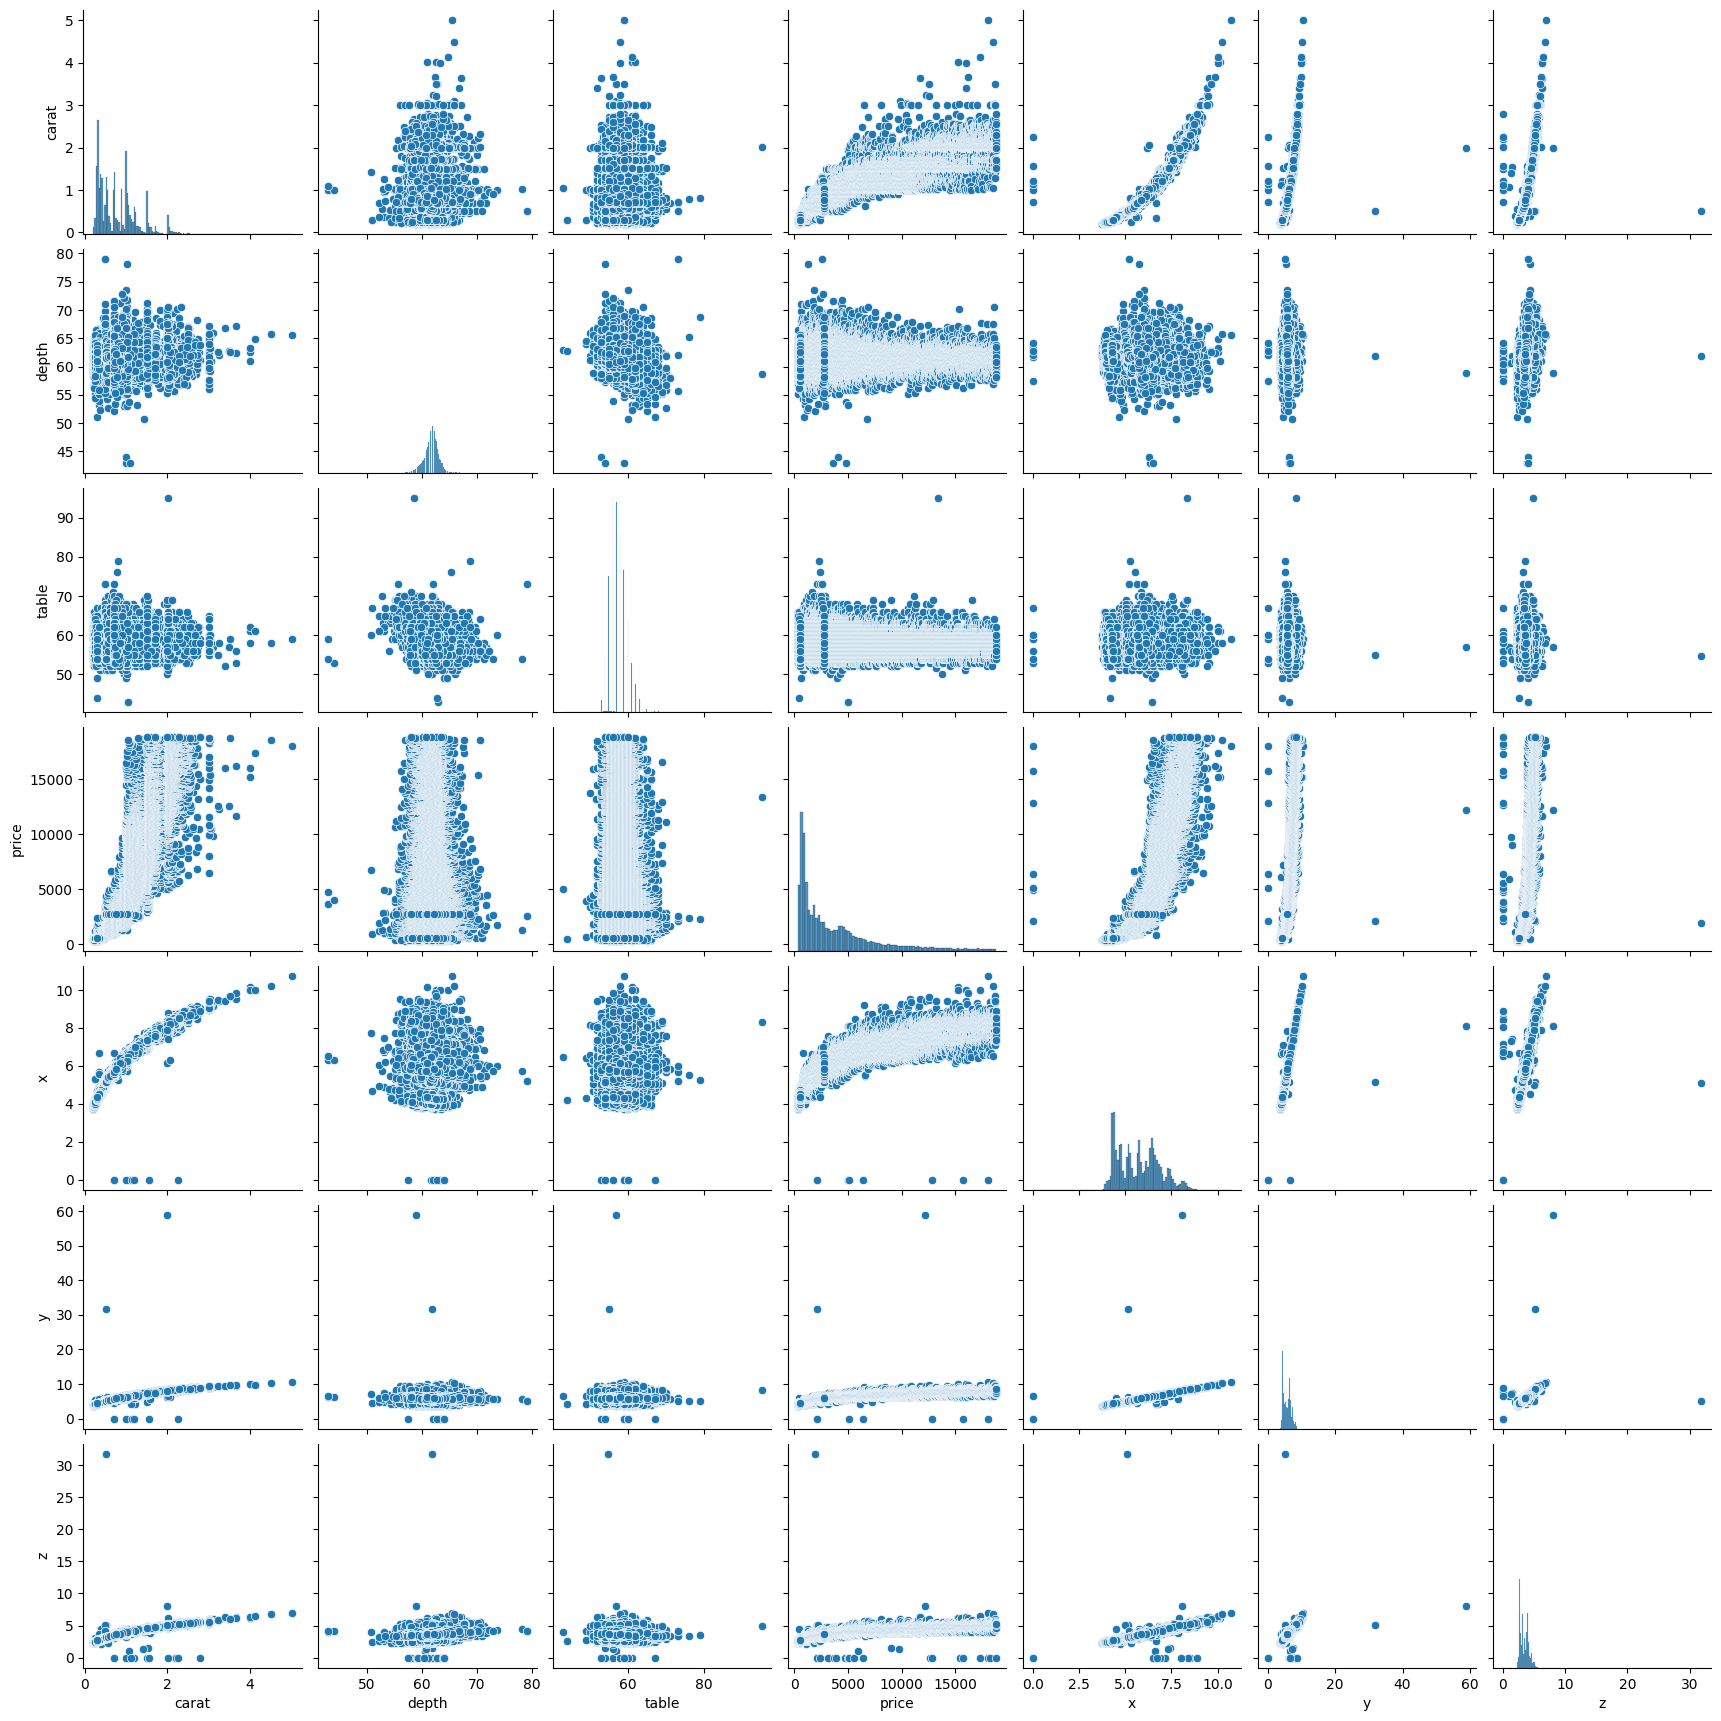

In [4]:
sns.pairplot(df.drop(['Unnamed: 0'],axis=1))

<Axes: xlabel='price', ylabel='carat'>

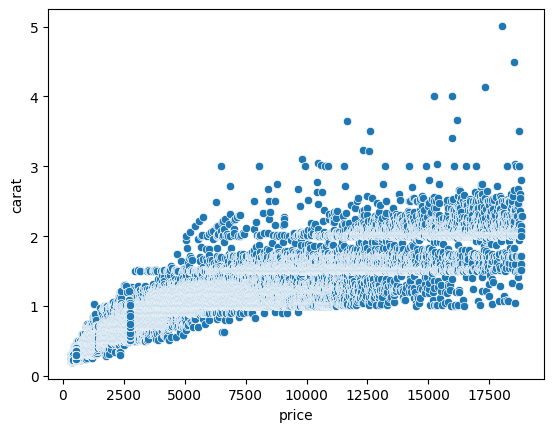

In [5]:
sns.scatterplot(df,y='carat',x='price')

<Axes: xlabel='price', ylabel='x'>

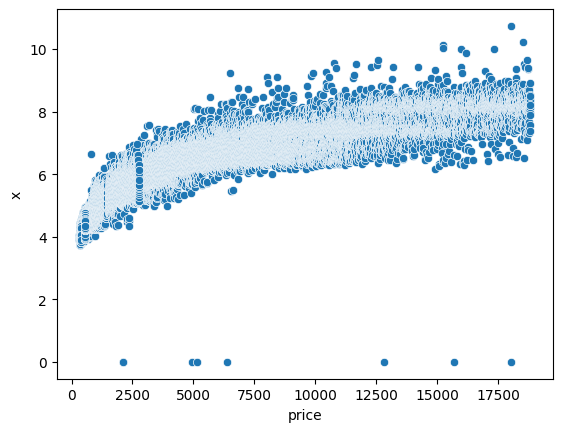

In [6]:
sns.scatterplot(df,x='price',y='x')

<Axes: xlabel='x', ylabel='carat'>

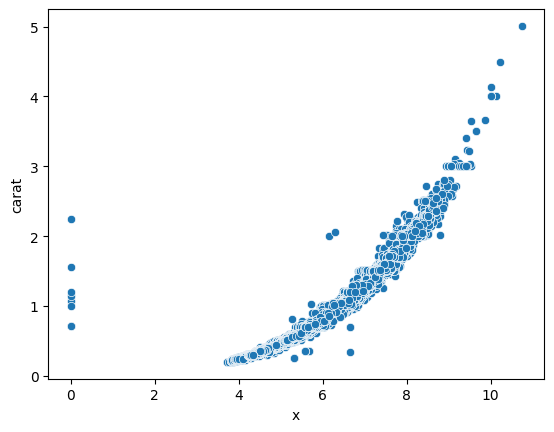

In [7]:
sns.scatterplot(df,y='carat',x='x')

<Axes: >

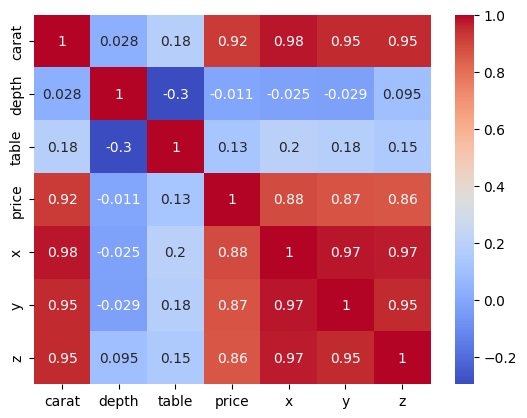

In [8]:
Corr_diamond = (df.drop(['cut', 'color', 'clarity','Unnamed: 0'],axis=1)).corr()
sns.heatmap(Corr_diamond,cmap='coolwarm',annot=True)

# Preprocessing 

*Hot Encoding of Categorical Columns*

In [9]:
df_ob=df.select_dtypes(include = ['object'])
cat_col = (df_ob.nunique()).index.tolist()
cat_col

['cut', 'color', 'clarity']

In [10]:
encoded_df = pd.get_dummies(df_feat, columns=cat_col)
encoded_df.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,3.89,3.84,2.31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False


# Model Training 

In [11]:
from sklearn.model_selection import train_test_split
X = encoded_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [13]:
predictions = Lr.predict(X_test)

# Evaluating Predictions 

Text(0, 0.5, 'Predictions')

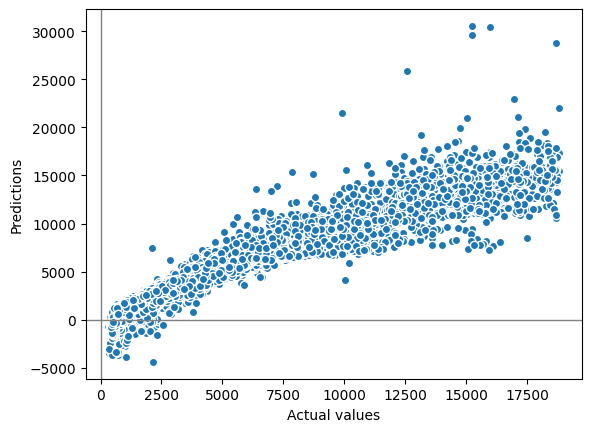

In [14]:
plt.scatter(y_test,predictions,edgecolors='white')
plt.xlabel('Actual values')
plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.ylabel('Predictions')

In [15]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 734.2415163929646
MSE: 1244765.435715869
RMSE: 1115.6905645006902
